In [5]:
import numpy as np
import xarray as xr
import gsw
import matplotlib.pyplot as plt
from osprey.actions.reader import reader_nemo, reader_rebuilt, reader_rebuilt2
from osprey.means.means import elements

In [40]:
df = elements('ORCA2')

2024-10-24 16:07:31,681 - INFO - Data available in the range 2000-2000.
2024-10-24 16:07:32,799 - INFO - Data available in the range 2349-2349.


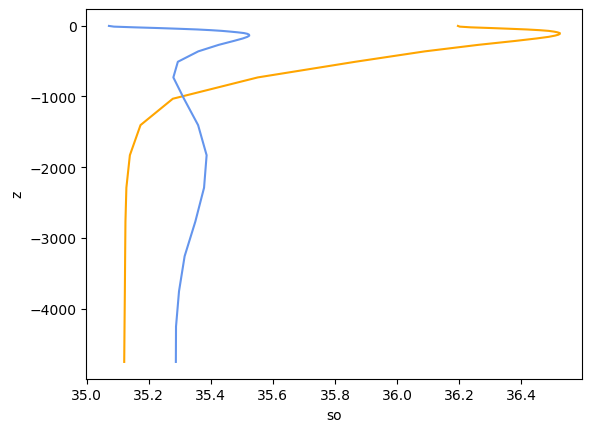

In [108]:
data = reader_nemo(expname='lfr0', startyear=2000, endyear=2000)
data['z'] = -data['z']
#data = data.mean(dim='time')
data = data.isel(time=-1)
pressure = gsw.p_from_z(data['z'], data['lat'])
theta1 = data['thetao']
so1 = data['so']
rho1 = gsw.density.rho(theta1, so1, pressure)

data = reader_nemo(expname='lgr3', startyear=2349, endyear=2349)
data['z'] = -data['z']
#data = data.mean(dim='time')
data = data.isel(time=-1)
pressure = gsw.p_from_z(data['z'], data['lat'])
theta2 = data['thetao']
so2 = data['so']
rho2 = gsw.density.rho(theta2, so2, pressure)

rhom1 = rho1.weighted(df['S']).mean(dim=['x', 'y'])
rhom2 = rho2.weighted(df['S']).mean(dim=['x', 'y'])
tem1 = theta1.weighted(df['S']).mean(dim=['x', 'y'])
tem2 = theta2.weighted(df['S']).mean(dim=['x', 'y'])
som1 = so1.weighted(df['S']).mean(dim=['x', 'y'])
som2 = so2.weighted(df['S']).mean(dim=['x', 'y'])

#rhom1.plot(y='z', color='red')
#rhom2.plot(y='z', color='blue')
#tem1.plot(y='z', color='orange')
#tem2.plot(y='z', color='cornflowerblue')
som1.plot(y='z', color='orange')
som2.plot(y='z', color='cornflowerblue')


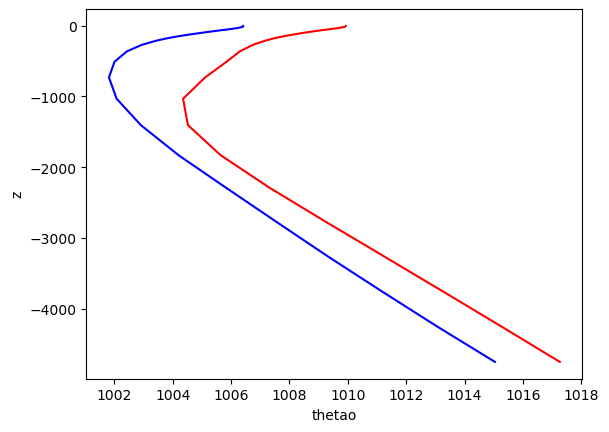

In [109]:
rhom1.plot(y='z', color='red')
rhom2.plot(y='z', color='blue')

In [97]:
ape1 = (rho1).weighted(df['V']).mean(dim=['x', 'y', 'z'])
ape2 = (rho2).weighted(df['V']).mean(dim=['x', 'y', 'z'])

In [98]:
ape1.values, ape2.values

(array(1008.46141577), array(1006.26969144))

2024-10-24 16:05:17,578 - INFO - Data available in the range 2000-2000.


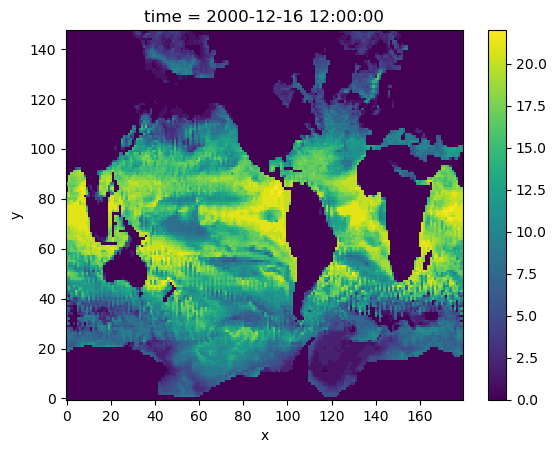

In [101]:
data = reader_nemo(expname='FE05', startyear=2000, endyear=2000)
data['z'] = -data['z']
#data = data.mean(dim='time')
data = data.isel(time=-1)
pressure = gsw.p_from_z(data['z'], data['lat'])
theta = data['thetao']
so = data['so']
rho = gsw.density.rho(theta, so, pressure)

dz = data['z'].diff(dim='z')
rhog = rho.diff(dim='z') / dz

zones = {}
zones = xr.where(rhog > 0, 1.0, 0.0)
sumzones = zones.sum(dim='z')
sumzones.plot()

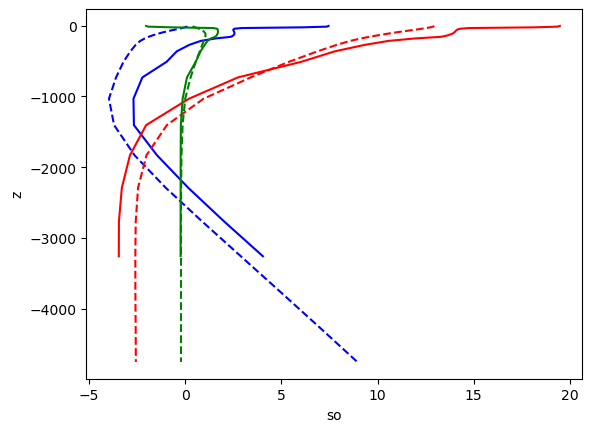

In [83]:
xg=90
yg=75
rhom = rho.weighted(df['S']).mean(dim=['x', 'y'])
averhom = rho.weighted(df['V']).mean(dim=['x', 'y', 'z'])
averho = rho.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])

avetheta = theta.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])
thetam = theta.weighted(df['S']).mean(dim=['x', 'y'])
avethetam = theta.weighted(df['V']).mean(dim=['x', 'y', 'z'])

aveso = so.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])
som = so.weighted(df['S']).mean(dim=['x', 'y'])
avesom = so.weighted(df['V']).mean(dim=['x', 'y', 'z'])

(rho-averho).isel(x=xg,y=yg).plot(y='z', color='blue', linestyle='-')
(rhom-averhom).plot(y='z', color='blue', linestyle='--')

(theta-avetheta).isel(x=xg,y=yg).plot(y='z', color='red', linestyle='-')
(thetam-avethetam).plot(y='z', color='red', linestyle='--')

(so-aveso).isel(x=xg,y=yg).plot(y='z', color='green', linestyle='-')
(som-avesom).plot(y='z', color='green', linestyle='--')


2024-10-24 16:07:57,087 - INFO -  File to be loaded ['/ec/res4/scratch/itas/martini/FE05/011/FE05_00058432_restart.nc']


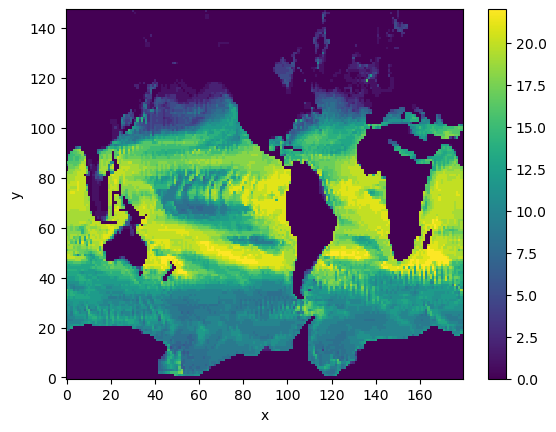

In [111]:
data = reader_rebuilt(expname='FE05', startleg=11, endleg=11)
data = data.rename({'time_counter': 'time', 'nav_lev': 'z', 'nav_lat': 'lat', 'nav_lon': 'lon'})
data = data.isel(time=0)
data = data.drop_vars(['time'], errors='ignore')
data['z'] = -data['z']
pressure = gsw.p_from_z(data['z'], data['lat'])
rho = gsw.density.rho(data['tn'], data['sn'], pressure)

dz = data['z'].diff(dim='z')
rhog = rho.diff(dim='z') / dz

zones = {}
zones = xr.where(rhog > 0, 1.0, 0.0)
sumzones = zones.sum(dim='z')
sumzones.plot()

In [129]:
#data['rhop'].weighted(df['S']).mean(dim=['x', 'y']).plot(y='z')
rho = xr.where(data['rhop'] == 0.0, np.nan, data['rhop'].values)


<xarray.DataArray 'rhop' ()> Size: 8B
dask.array<_nanmin_skip-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

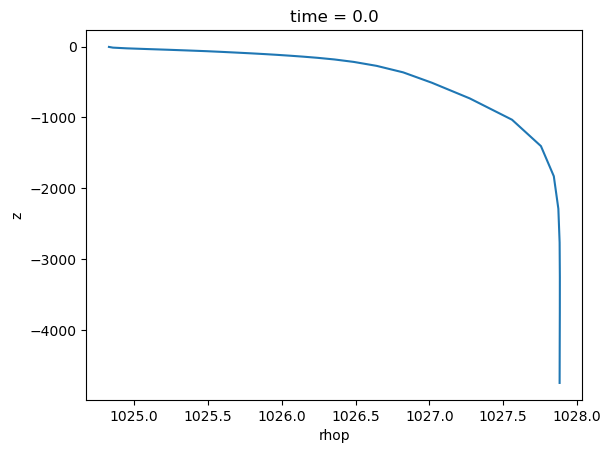

In [134]:
rho.weighted(df['S']).mean(dim=['x', 'y']).plot(y='z')

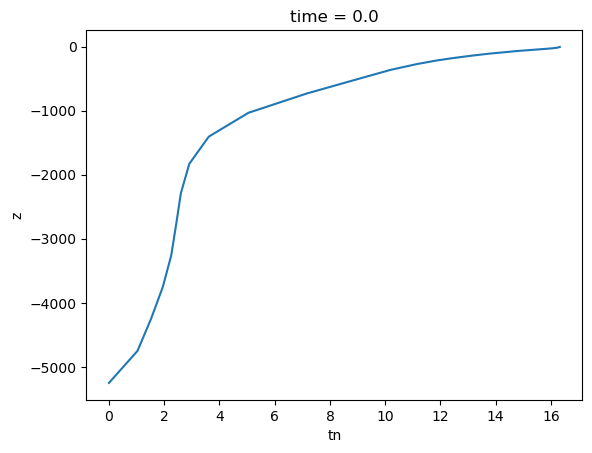

In [126]:
data['tn'].weighted(df['S']).mean(dim=['x', 'y']).plot(y='z')

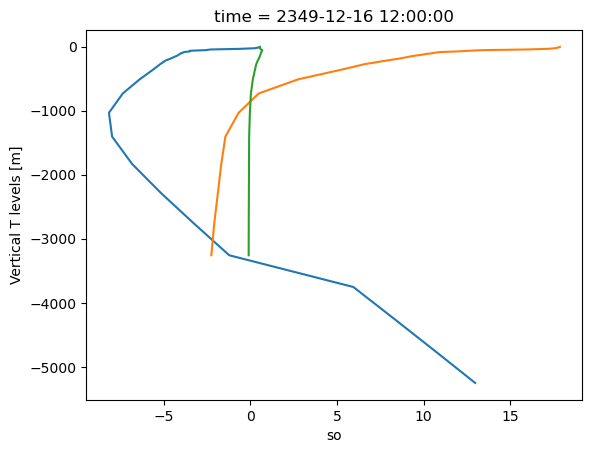

In [81]:
xg=90
yg=75
averho = rho.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])
avetheta = theta.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])
aveso = so.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])
(rho-averho).isel(x=xg,y=yg).plot(y='z')
(theta-avetheta).isel(x=xg,y=yg).plot(y='z')
(so-aveso).isel(x=xg,y=yg).plot(y='z')

2024-10-24 13:34:11,050 - INFO -  File to be loaded ['/ec/res4/scratch/itas/martini/FE05/011/FE05_00058432_restart.nc']


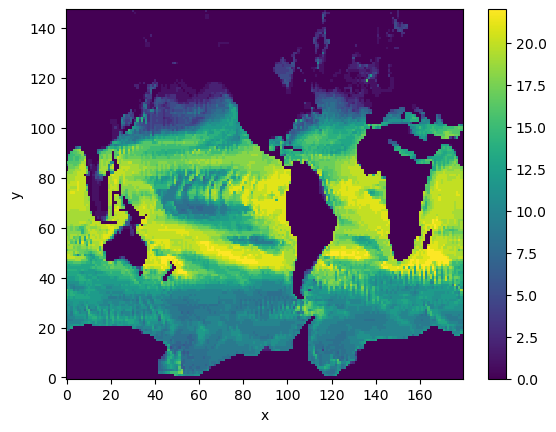

In [57]:
data = reader_rebuilt(expname='FE05', startleg=11, endleg=11)
data = data.rename({'time_counter': 'time', 'nav_lev': 'z', 'nav_lat': 'lat', 'nav_lon': 'lon'})
data = data.isel(time=0)
data = data.drop_vars(['time'], errors='ignore')
data['z'] = -data['z']
pressure = gsw.p_from_z(data['z'], data['lat'])
rho = gsw.density.rho(data['tn'], data['sn'], pressure)

dz = data['z'].diff(dim='z')
rhog = rho.diff(dim='z') / dz

zones = {}
zones = xr.where(rhog > 0, 1.0, 0.0)
sumzones = zones.sum(dim='z')
sumzones.plot()

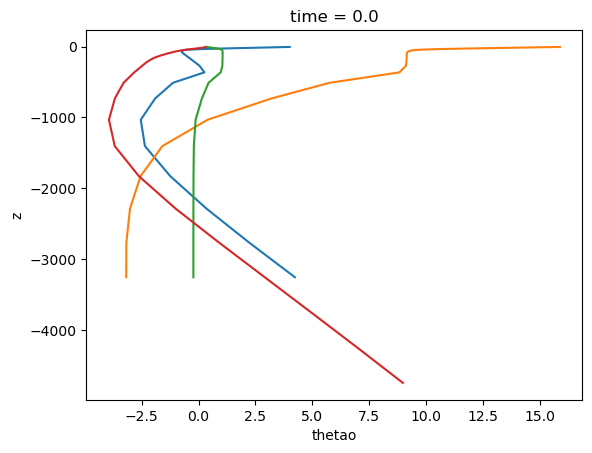

In [65]:
xg=90
yg=75
meanrho = rho.weighted(df['S']).mean(dim=['x', 'y'])
avemean = rho.weighted(df['V']).mean(dim=['x', 'y', 'z'])
averho = rho.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])
avetheta = theta.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])
aveso = so.isel(x=xg,y=yg).weighted(df['z']).mean(dim=['z'])
(rho-averho).isel(x=xg,y=yg).plot(y='z')
(theta-avetheta).isel(x=xg,y=yg).plot(y='z')
(so-aveso).isel(x=xg,y=yg).plot(y='z')
(meanrho-avemean).plot(y='z')

2024-10-24 13:35:28,488 - INFO -  File to be loaded ['/ec/res4/scratch/itas/martini/FE02/101/FE02_00584400_restart.nc']


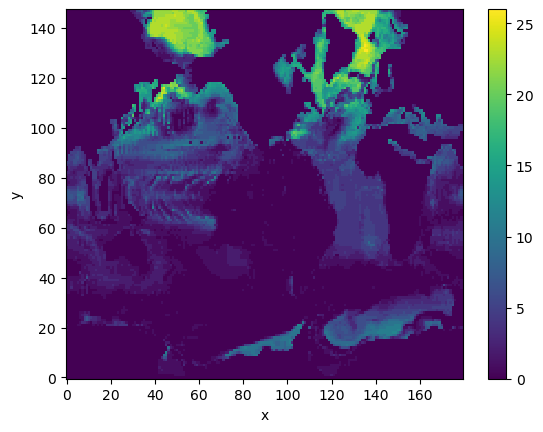

In [61]:
data = reader_rebuilt(expname='FE02', startleg=101, endleg=101)
data = data.rename({'time_counter': 'time', 'nav_lev': 'z', 'nav_lat': 'lat', 'nav_lon': 'lon'})
data = data.isel(time=0)
data = data.drop_vars(['time'], errors='ignore')
data['z'] = -data['z']

dz = data['z'].diff(dim='z')
thetag = data['tn'].diff(dim='z') / dz

zones = {}
zones = xr.where(thetag < 0, 1.0, 0.0)
sumzones = zones.sum(dim='z')
sumzones.plot()

2024-10-24 13:35:45,170 - INFO -  File to be loaded ['/ec/res4/scratch/itas/martini/FE02/101/FE02_00584400_restart.nc']


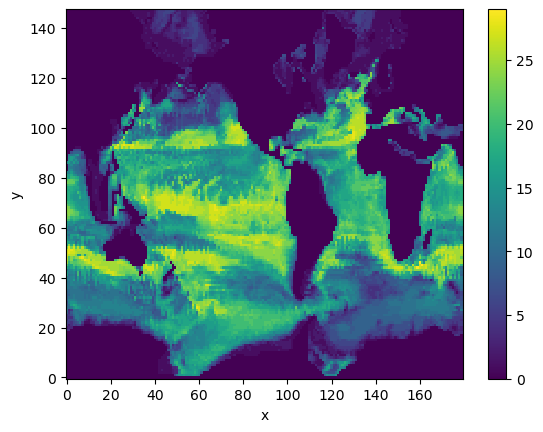

In [62]:
data = reader_rebuilt(expname='FE02', startleg=101, endleg=101)
data = data.rename({'time_counter': 'time', 'nav_lev': 'z', 'nav_lat': 'lat', 'nav_lon': 'lon'})
data = data.isel(time=0)
data = data.drop_vars(['time'], errors='ignore')
data['z'] = -data['z']

dz = data['z'].diff(dim='z')
thetag = data['sn'].diff(dim='z') / dz

zones = {}
zones = xr.where(thetag > 0, 1.0, 0.0)
sumzones = zones.sum(dim='z')
sumzones.plot()